<a href="https://colab.research.google.com/github/MaheshRaturi211/SkinDisease-Classifier-CNN/blob/master/dermi2model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username":"mahesh1773","key":"0fdfa7224b09f11b18f29949509f46a4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [9]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
!kaggle datasets list -s skin

ref                                                    title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
kmader/skin-cancer-mnist-ham10000                      Skin Cancer MNIST: HAM10000                      3GB  2018-09-20 20:36:13          12457  
fanconic/skin-cancer-malignant-vs-benign               Skin Cancer: Malignant vs. Benign              162MB  2019-06-19 21:51:11            609  
uciml/pima-indians-diabetes-database                   Pima Indians Diabetes Database                   9KB  2016-10-06 18:31:56          56456  
drscarlat/melanoma                                     melanoma                                         3GB  2018-12-02 04:01:51            282  
alxmamaev/minecraft-skins                              Minecraft skins                                 16MB  2018-05-28 18:3

In [12]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 -p /content

100% 2.61G/2.62G [00:27<00:00, 141MB/s]
100% 2.62G/2.62G [00:27<00:00, 104MB/s]


In [0]:
!mkdir dataset

In [14]:
!unzip skin-cancer-mnist-ham10000.zip

Archive:  skin-cancer-mnist-ham10000.zip
  inflating: hmnist_28_28_RGB.csv    
  inflating: HAM10000_metadata.csv   
  inflating: HAM10000_images_part_1.zip  
  inflating: hmnist_28_28_L.csv      
  inflating: hmnist_8_8_L.csv        
  inflating: HAM10000_images_part_2.zip  
  inflating: hmnist_8_8_RGB.csv      


In [0]:
!unzip HAM10000_images_part_1.zip -d dataset

In [0]:
!unzip HAM10000_images_part_2.zip -d dataset

In [0]:
import cv2
import matplotlib.pyplot as plt

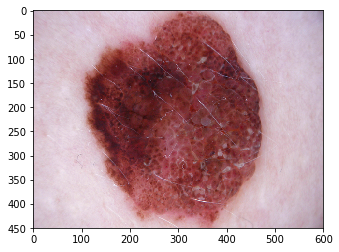

In [0]:
dermi=cv2.imread('/content/dataset/ISIC_0034320.jpg')
dermi=cv2.cvtColor(dermi,cv2.COLOR_BGR2RGB)
plt.imshow(dermi)

In [21]:
import pandas as pd
data=pd.read_csv('/content/HAM10000_metadata.csv')
data.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


In [0]:
data2=pd.read_csv('/content/hmnist_28_28_RGB.csv')
data2.head(10)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,162,192,208,165,201,209,165,205,208,165,194,212,169,198,216,181,204,216,178,204,215,172,205,217,173,209,217,166,202,214,...,216,181,212,215,176,208,213,168,191,209,159,184,212,168,194,212,172,198,208,173,193,203,168,183,190,142,152,177,123,134,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,128,158,172,136,162,175,134,157,177,126,158,186,138,163,197,153,187,198,153,186,203,168,206,205,169,204,207,164,199,205,...,209,176,203,207,171,191,208,172,197,205,169,188,198,159,172,200,159,192,191,140,182,177,128,141,147,101,97,113,79,82,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,149,165,207,149,159,209,156,164,202,136,130,200,133,129,208,146,157,212,159,167,214,157,168,211,143,150,215,148,169,213,...,221,168,175,222,170,188,221,167,184,203,144,155,201,146,155,210,163,177,190,142,152,192,152,172,194,153,176,178,134,149,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,125,134,177,118,123,190,137,146,192,127,143,200,141,162,207,156,170,202,144,151,202,138,155,212,159,177,211,155,172,211,...,181,137,145,189,147,166,192,157,185,169,129,144,148,114,122,157,125,137,157,127,147,154,128,147,130,102,114,87,63,73,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,179,214,232,189,222,235,193,219,234,191,206,238,200,219,244,213,240,243,213,239,242,210,238,244,216,241,247,224,244,246,...,238,195,209,237,191,200,238,194,201,239,197,216,238,195,219,232,179,201,217,150,173,224,171,207,227,177,206,222,178,201,209,166,185,172,135,149,109,78,92,2
5,8,1,3,19,5,10,26,8,13,34,13,24,100,69,73,167,134,140,205,174,181,216,176,175,225,188,203,232,198,221,236,204,224,239,212,230,238,207,226,236,...,153,92,116,172,115,144,197,140,174,188,132,165,174,128,157,150,111,134,101,66,87,44,19,34,31,11,17,25,9,15,12,3,7,5,0,1,4,0,0,2
6,194,147,137,197,148,139,197,148,132,200,154,142,202,156,150,200,151,144,204,153,152,202,149,146,204,153,152,206,158,159,206,160,159,207,163,163,207,162,165,209,...,220,175,174,219,174,176,218,172,172,216,166,169,215,167,172,214,166,172,213,166,169,213,166,173,213,163,172,208,155,158,211,160,163,211,162,166,208,162,166,2
7,161,121,105,169,128,119,172,129,116,176,134,125,181,134,129,185,136,135,189,138,136,192,140,132,195,146,140,198,150,144,199,151,142,201,148,142,205,156,156,203,...,210,164,161,212,170,172,209,163,164,206,159,161,199,153,151,196,152,151,195,152,151,188,141,129,183,138,125,171,127,113,141,103,92,87,59,56,32,18,19,2
8,125,84,85,165,114,118,181,120,125,188,133,142,189,132,146,193,134,148,196,132,150,200,134,152,205,143,163,208,145,164,212,155,173,216,167,188,219,169,192,219,...,203,150,166,198,130,147,199,128,144,201,140,158,198,141,159,198,144,158,192,136,147,187,124,134,178,115,123,156,109,111,119,80,79,62,35,41,19,8,13,2
9,228,179,194,227,174,191,226,165,182,215,157,175,206,149,164,216,152,167,219,150,167,224,162,183,231,176,197,230,171,182,233,178,196,235,184,204,232,177,195,231,...,233,184,203,239,199,221,235,191,211,231,170,186,232,171,191,231,174,193,227,167,183,228,179,193,218,147,153,212,136,138,217,142,156,219,154,166,216,146,154,2


In [0]:
data.shape

(10015, 7)

In [0]:
import os
from glob import glob
path_dataset='/content/dataset'
image_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(path_dataset, '*.jpg'))}

In [0]:
print(image_path_dict)

{'ISIC_0029899': '/content/dataset/ISIC_0029899.jpg', 'ISIC_0030842': '/content/dataset/ISIC_0030842.jpg', 'ISIC_0025248': '/content/dataset/ISIC_0025248.jpg', 'ISIC_0024900': '/content/dataset/ISIC_0024900.jpg', 'ISIC_0032044': '/content/dataset/ISIC_0032044.jpg', 'ISIC_0024575': '/content/dataset/ISIC_0024575.jpg', 'ISIC_0030964': '/content/dataset/ISIC_0030964.jpg', 'ISIC_0028781': '/content/dataset/ISIC_0028781.jpg', 'ISIC_0028952': '/content/dataset/ISIC_0028952.jpg', 'ISIC_0027993': '/content/dataset/ISIC_0027993.jpg', 'ISIC_0033888': '/content/dataset/ISIC_0033888.jpg', 'ISIC_0033804': '/content/dataset/ISIC_0033804.jpg', 'ISIC_0027275': '/content/dataset/ISIC_0027275.jpg', 'ISIC_0033964': '/content/dataset/ISIC_0033964.jpg', 'ISIC_0030193': '/content/dataset/ISIC_0030193.jpg', 'ISIC_0027172': '/content/dataset/ISIC_0027172.jpg', 'ISIC_0028478': '/content/dataset/ISIC_0028478.jpg', 'ISIC_0024369': '/content/dataset/ISIC_0024369.jpg', 'ISIC_0025682': '/content/dataset/ISIC_002568

In [0]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [0]:
df1 = pd.read_csv('HAM10000_metadata.csv')
df1['path'] = df1['image_id'].map(image_path_dict.get)
df1['cell_type'] = df1['dx'].map(lesion_type_dict.get) 
df1['cell_type_idx'] = pd.Categorical(df1['cell_type']).codes

In [23]:
df1.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/dataset/ISIC_0027419.jpg,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/dataset/ISIC_0025030.jpg,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/dataset/ISIC_0026769.jpg,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/dataset/ISIC_0025661.jpg,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/dataset/ISIC_0031633.jpg,Benign keratosis-like lesions,2
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,/content/dataset/ISIC_0027850.jpg,Benign keratosis-like lesions,2
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,/content/dataset/ISIC_0029176.jpg,Benign keratosis-like lesions,2
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,/content/dataset/ISIC_0029068.jpg,Benign keratosis-like lesions,2
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,/content/dataset/ISIC_0025837.jpg,Benign keratosis-like lesions,2
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,/content/dataset/ISIC_0025209.jpg,Benign keratosis-like lesions,2


In [24]:
#how much data is unavailable
df1.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

In [0]:
#now replace all the null values by their mean
df1['age'].fillna((df1['age'].mean()), inplace=True)

In [0]:
df1.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [0]:
print(df1.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
path              object
cell_type         object
cell_type_idx       int8
dtype: object


In [0]:
import numpy as np
from PIL import Image
df1['imagedata'] = df1['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [27]:
df1.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,imagedata
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/dataset/ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[191, 153, 194], [191, 154, 198], [189, 152,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/dataset/ISIC_0025030.jpg,Benign keratosis-like lesions,2,"[[[23, 13, 22], [25, 15, 24], [24, 16, 31], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/dataset/ISIC_0026769.jpg,Benign keratosis-like lesions,2,"[[[186, 126, 136], [190, 136, 149], [195, 137,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/dataset/ISIC_0025661.jpg,Benign keratosis-like lesions,2,"[[[24, 11, 18], [27, 13, 26], [39, 23, 33], [6..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/dataset/ISIC_0031633.jpg,Benign keratosis-like lesions,2,"[[[136, 91, 114], [148, 104, 127], [161, 117, ..."
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,/content/dataset/ISIC_0027850.jpg,Benign keratosis-like lesions,2,"[[[5, 1, 2], [6, 0, 2], [10, 1, 4], [12, 3, 8]..."
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,/content/dataset/ISIC_0029176.jpg,Benign keratosis-like lesions,2,"[[[193, 146, 130], [194, 148, 135], [192, 147,..."
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,/content/dataset/ISIC_0029068.jpg,Benign keratosis-like lesions,2,"[[[153, 108, 89], [155, 114, 94], [162, 125, 1..."
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,/content/dataset/ISIC_0025837.jpg,Benign keratosis-like lesions,2,"[[[103, 62, 66], [115, 79, 81], [133, 93, 94],..."
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,/content/dataset/ISIC_0025209.jpg,Benign keratosis-like lesions,2,"[[[229, 177, 189], [232, 187, 207], [230, 173,..."


In [28]:
df1.iloc[1096:1110]

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,imagedata
1096,HAM_0005276,ISIC_0028790,df,histo,75.0,male,back,/content/dataset/ISIC_0028790.jpg,Dermatofibroma,3,"[[[211, 160, 167], [214, 167, 177], [218, 165,..."
1097,HAM_0004103,ISIC_0028880,df,histo,55.0,male,lower extremity,/content/dataset/ISIC_0028880.jpg,Dermatofibroma,3,"[[[219, 190, 220], [220, 191, 219], [220, 192,..."
1098,HAM_0004103,ISIC_0031309,df,histo,55.0,male,lower extremity,/content/dataset/ISIC_0031309.jpg,Dermatofibroma,3,"[[[25, 18, 26], [46, 33, 42], [64, 44, 55], [8..."
1099,HAM_0001164,ISIC_0030021,df,histo,50.0,female,upper extremity,/content/dataset/ISIC_0030021.jpg,Dermatofibroma,3,"[[[197, 155, 159], [199, 158, 166], [200, 158,..."
1100,HAM_0001164,ISIC_0027118,df,histo,50.0,female,upper extremity,/content/dataset/ISIC_0027118.jpg,Dermatofibroma,3,"[[[12, 3, 4], [15, 6, 7], [19, 10, 11], [34, 1..."
1101,HAM_0005684,ISIC_0027613,df,histo,75.0,female,lower extremity,/content/dataset/ISIC_0027613.jpg,Dermatofibroma,3,"[[[36, 23, 33], [57, 41, 51], [77, 61, 71], [1..."
1102,HAM_0005684,ISIC_0032468,df,histo,75.0,female,lower extremity,/content/dataset/ISIC_0032468.jpg,Dermatofibroma,3,"[[[219, 169, 172], [218, 169, 162], [226, 176,..."
1103,HAM_0004330,ISIC_0029760,df,histo,70.0,male,lower extremity,/content/dataset/ISIC_0029760.jpg,Dermatofibroma,3,"[[[31, 13, 27], [31, 13, 27], [34, 13, 28], [3..."
1104,HAM_0004330,ISIC_0030555,df,histo,70.0,male,lower extremity,/content/dataset/ISIC_0030555.jpg,Dermatofibroma,3,"[[[134, 111, 129], [146, 121, 140], [160, 135,..."
1105,HAM_0007526,ISIC_0030244,df,histo,50.0,male,lower extremity,/content/dataset/ISIC_0030244.jpg,Dermatofibroma,3,"[[[37, 27, 28], [34, 23, 27], [32, 23, 24], [3..."


In [0]:
features=df1.drop(columns=['cell_type_idx'],axis=1)
target=df1['cell_type_idx']

In [0]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(features, target, test_size=0.20,random_state=1234)

In [0]:
#Normalisation
x_train = np.asarray(x_train1['imagedata'].tolist())
x_test = np.asarray(x_test1['imagedata'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [32]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train1, num_classes = 7)
y_test = to_categorical(y_test1, num_classes = 7)

Using TensorFlow backend.


In [0]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [0]:
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [36]:
#Model Building -CNN Model
input_shape = (75, 100, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

W0804 08:42:49.947885 140137033828224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 08:42:49.986233 140137033828224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 08:42:49.992997 140137033828224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 08:42:50.035488 140137033828224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0804 08:42:50.042248 140137033828224 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 25, 64)        0         
__________

In [37]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

W0804 08:42:59.045729 140137033828224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 08:42:59.078089 140137033828224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)

datagen.fit(x_train)

In [39]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 50 
batch_size = 10
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

W0804 08:43:09.089188 140137033828224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
721/721 [==============================] - 23s 32ms/step - loss: 1.0320 - acc: 0.6655 - val_loss: 0.9211 - val_acc: 0.6820
Epoch 2/50
721/721 [==============================] - 15s 21ms/step - loss: 0.9184 - acc: 0.6709 - val_loss: 0.8723 - val_acc: 0.6845
Epoch 3/50
721/721 [==============================] - 15s 21ms/step - loss: 0.9044 - acc: 0.6718 - val_loss: 0.8555 - val_acc: 0.6983
Epoch 4/50
721/721 [==============================] - 15s 21ms/step - loss: 0.8788 - acc: 0.6770 - val_loss: 0.8680 - val_acc: 0.6945
Epoch 5/50
721/721 [==============================] - 15s 21ms/step - loss: 0.8693 - acc: 0.6817 - val_loss: 0.8284 - val_acc: 0.6920
Epoch 6/50
721/721 [==============================] - 15s 21ms/step - loss: 0.8595 - acc: 0.6867 - val_loss: 0.8072 - val_acc: 0.7095
Epoch 7/50
721/721 [==============================] - 15s 21ms/step - loss: 0.8429 - acc: 0.6943 - val_loss: 0.7783 - val_acc: 0.7045
Epoch 8/50
721/721 [==============================] - 15s 21ms

In [40]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

802/802 [==============================] - 0s 287us/step
Validation: accuracy = 0.780549  ;  loss_v = 0.607324
Test: accuracy = 0.759361  ;  loss = 0.634536


In [0]:
import pickle
pickle.dump(model,open('dermi.h5','wb'))

In [0]:
from keras.models import load_model
from keras.preprocessing import image
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(75, 100))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
new_image = load_image('/content/dataset/ISIC_0025661.jpg')
l=model.predict(new_image)

In [43]:
dermitype = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ','Basal cell carcinoma','Actinic keratoses','Vascular lesions', 'Dermatofibroma']
p=0
maxm=0.0
arr=l[0]
print(arr)
for i in range(1,len(arr),1):
  if arr[i]>maxm:
    p=i
    maxm=arr[i]
print(dermitype[p])

[0.03346781 0.85273904 0.02180105 0.04997499 0.029223   0.00100174
 0.01179239]
Melanoma


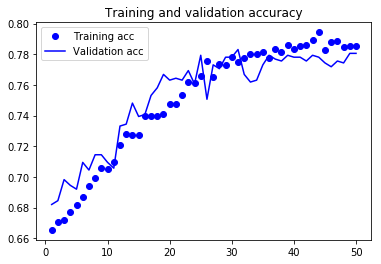

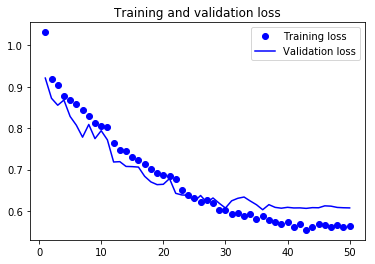

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()